c:\Users\skibret\Downloads\KAIM\Week-3\Project\Insurance Risk Analytics & Predictive Modeling\src\data_loader.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep='|')


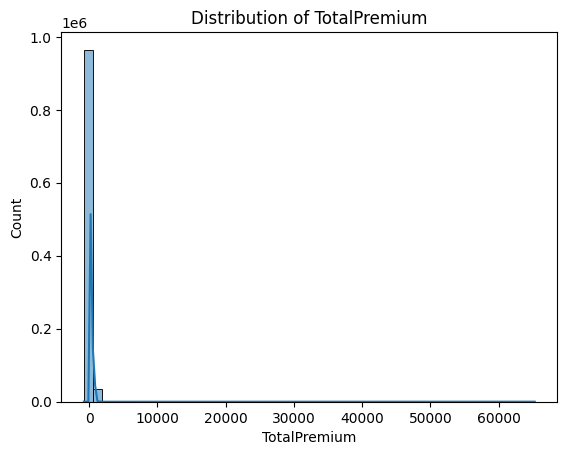

In [15]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.data_loader import load_insurance_data
from src.eda_utils import plot_distribution



df = load_insurance_data("../data/MachineLearningRating_v3.txt")

# Example usage
plot_distribution(df, "TotalPremium")

# Numeric Summary

In [2]:
# Numeric summary stats
numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured', 'CalculatedPremiumPerTerm']
df[numeric_cols].describe()

,TotalPremium,TotalClaims,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm
count,1.000098e+06,1.000098e+06,2.204560e+05,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,2.255311e+05,6.041727e+05,1.178757e+02
std,2.302845e+02,2.384075e+03,5.645157e+05,1.508332e+06,3.997017e+02
min,-7.825768e+02,-1.200241e+04,2.000000e+04,1.000000e-02,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.350000e+05,5.000000e+03,3.224800e+00
50%,2.178333e+00,0.000000e+00,2.200000e+05,7.500000e+03,8.436900e+00
75%,2.192982e+01,0.000000e+00,2.800000e+05,2.500000e+05,9.000000e+01
max,6.528260e+04,3.930921e+05,2.655000e+07,1.263620e+07,7.442217e+04


# Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

# Drop sparce columns

In [4]:
# Drop columns with no useful data
df.drop(columns=["NumberOfVehiclesInFleet", "CrossBorder"], inplace=True)

# 2 Data Quality Assessment

## Check for missing data

In [5]:
missing_summary = (
    df.isnull()
    .sum()
    .to_frame(name="MissingCount")
    .assign(MissingPercent=lambda x: (x["MissingCount"] / len(df)) * 100)
    .sort_values(by="MissingPercent", ascending=False)
)
print(missing_summary)
# Visualize missing data

                          MissingCount  MissingPercent
CustomValueEstimate             779642       77.956560
Converted                       641901       64.183810
WrittenOff                      641901       64.183810
Rebuilt                         641901       64.183810
NewVehicle                      153295       15.327998
Bank                            145961       14.594670
AccountType                      40232        4.022806
Gender                            9536        0.953507
MaritalStatus                     8259        0.825819
Cylinders                          552        0.055195
VehicleType                        552        0.055195
mmcode                             552        0.055195
cubiccapacity                      552        0.055195
make                               552        0.055195
bodytype                           552        0.055195
NumberOfDoors                      552        0.055195
kilowatts                          552        0.055195
VehicleInt

## Drop Columns with Missing Values above 50%

In [6]:
cols_to_drop = [
    "CustomValueEstimate",
    "Converted",
    "WrittenOff",
    "Rebuilt"
]

df.drop(columns=cols_to_drop, inplace=True)

print("Dropped:", cols_to_drop)

Dropped: ['CustomValueEstimate', 'Converted', 'WrittenOff', 'Rebuilt']


# 3 Univariate Analysis

## Numerical Columns Histogram

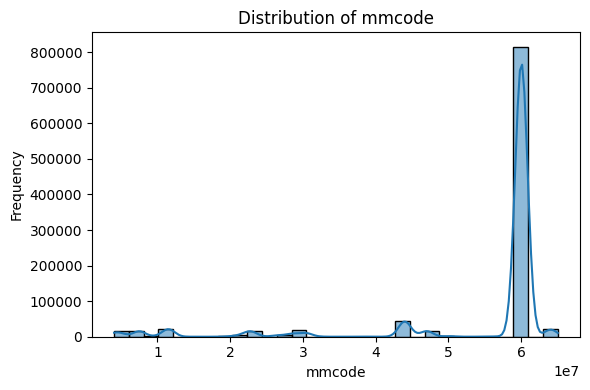

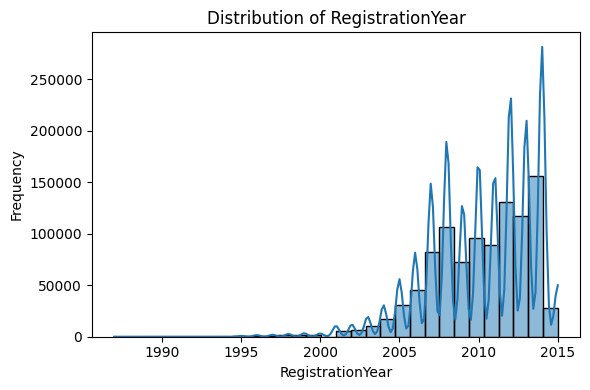

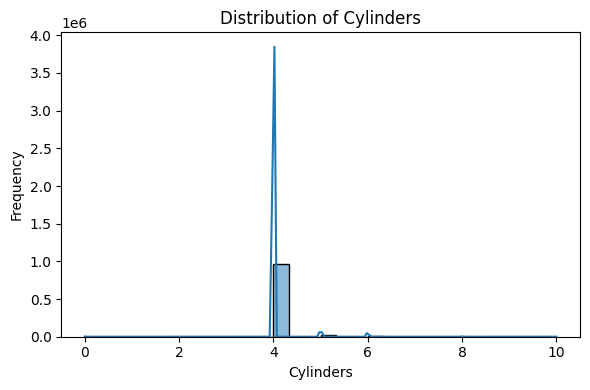

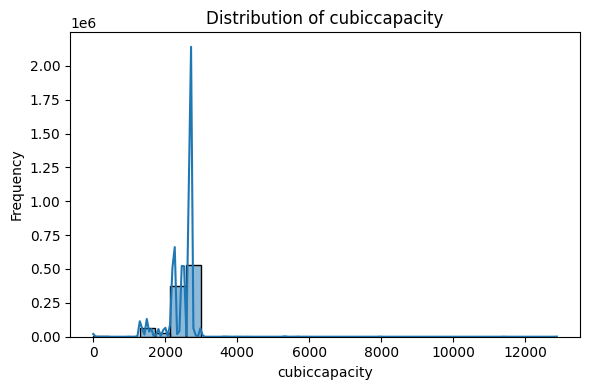

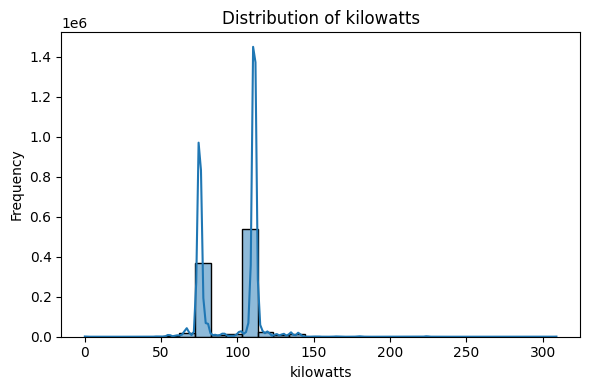

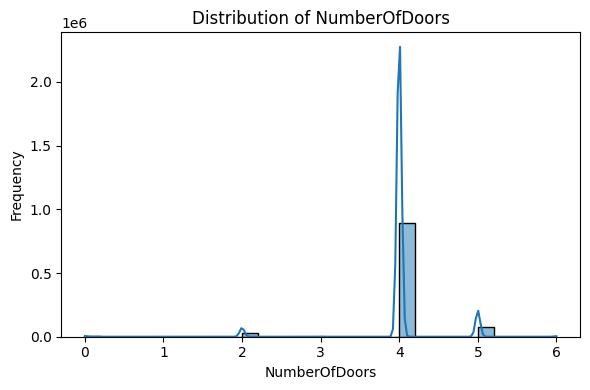

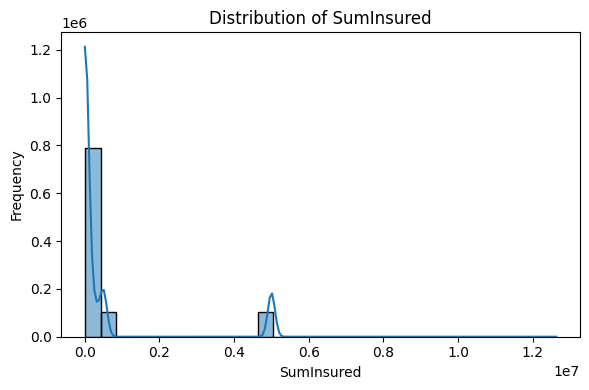

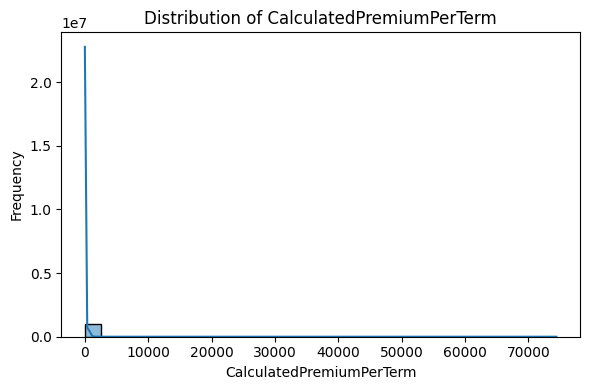

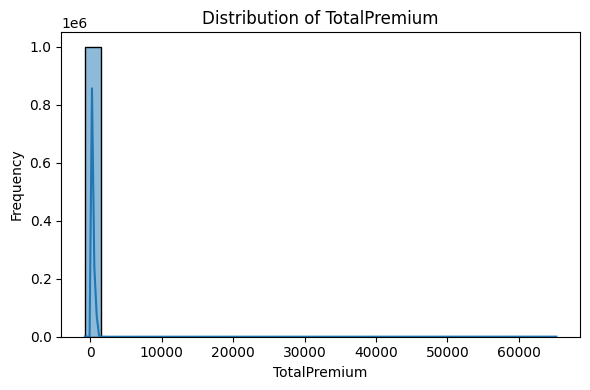

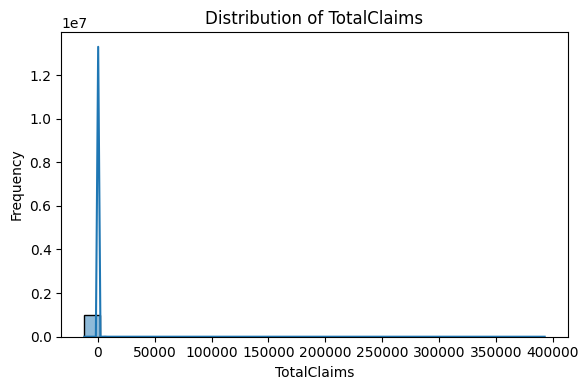

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Optional: Remove ID-like columns
id_like_cols = ["PolicyID", "UnderwrittenCoverID", "PostalCode"]
numerical_cols = [col for col in numerical_cols if col not in id_like_cols]

# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


## Categorical Columns

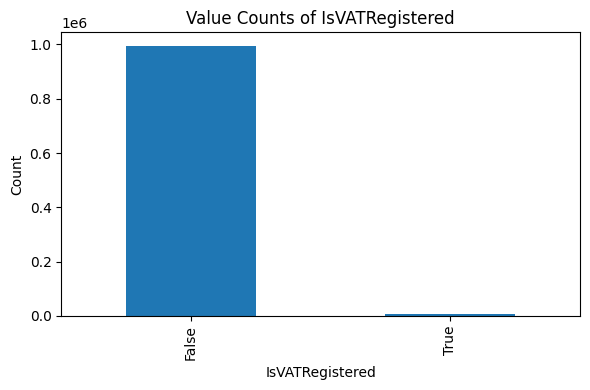

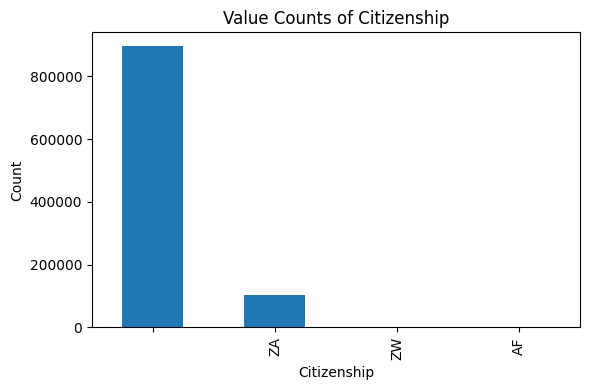

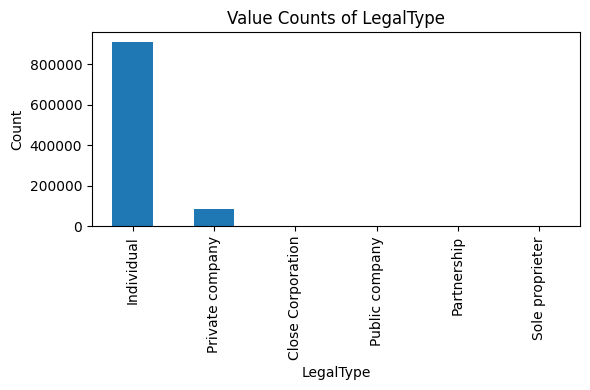

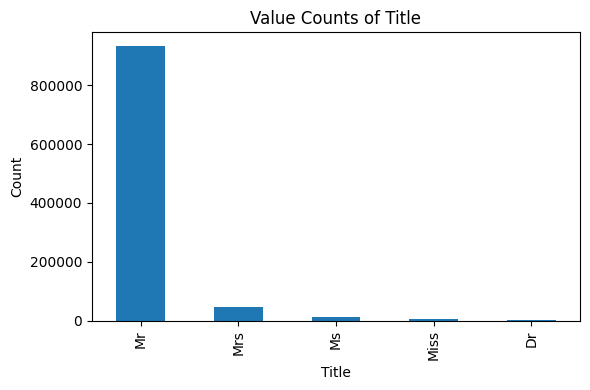

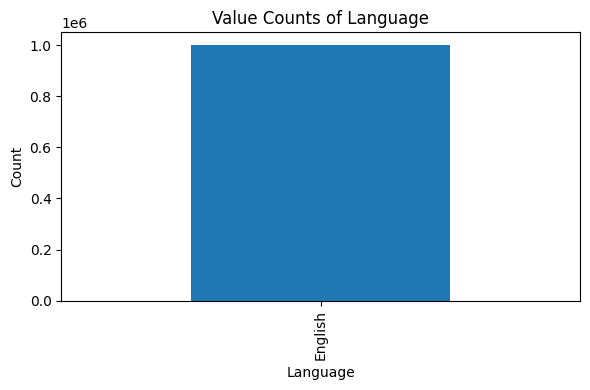

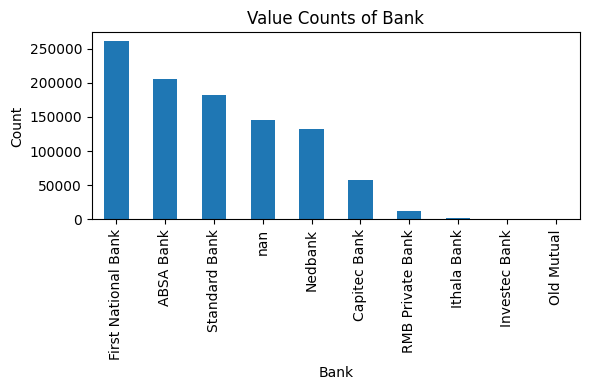

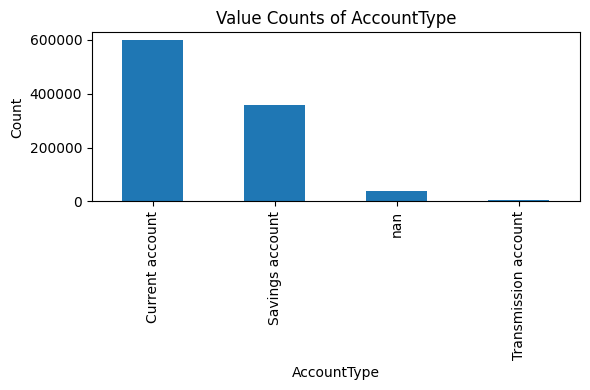

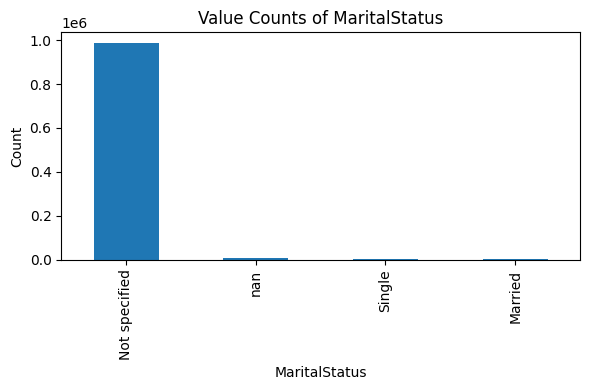

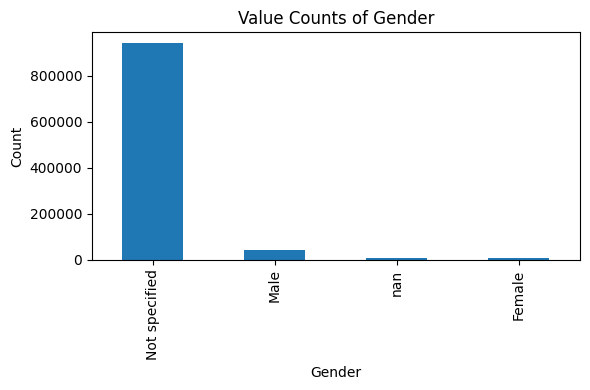

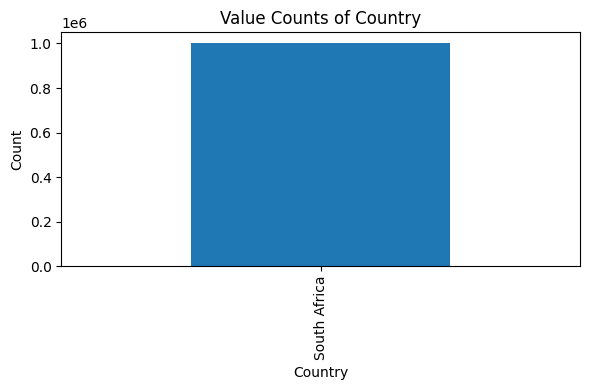

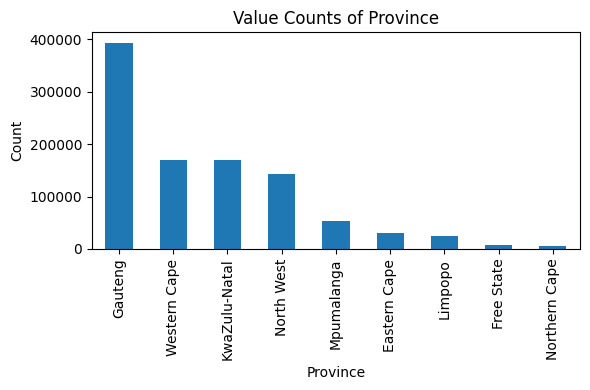

C:\Users\skibret\AppData\Local\Temp\ipykernel_13724\1369015302.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


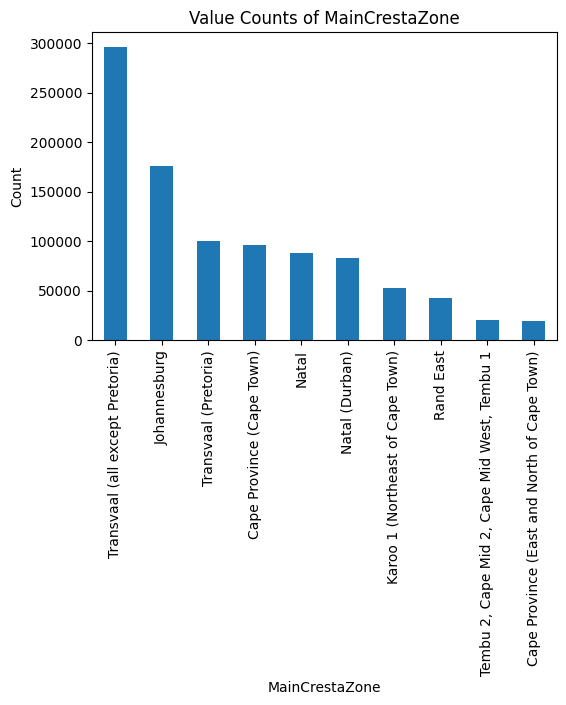

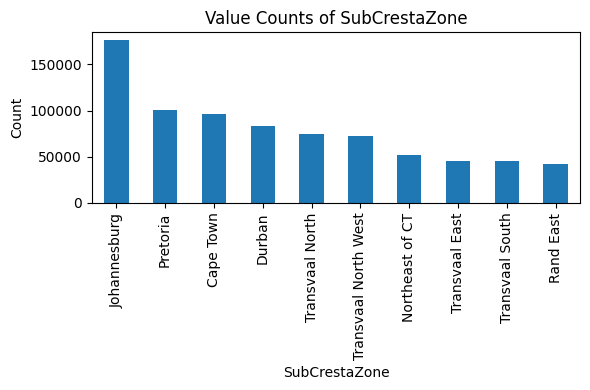

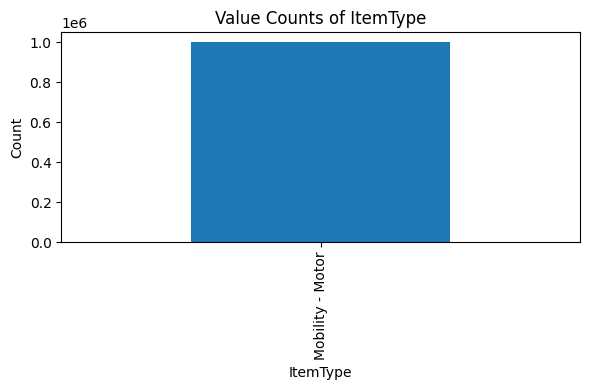

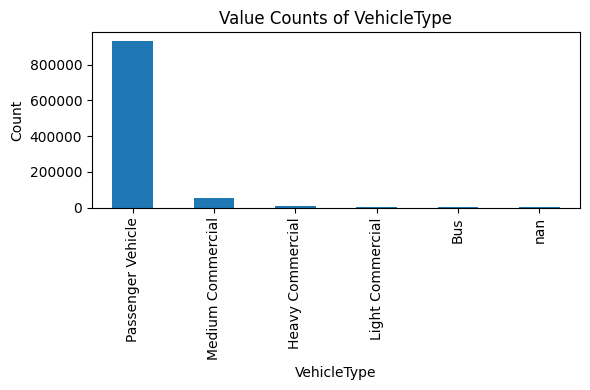

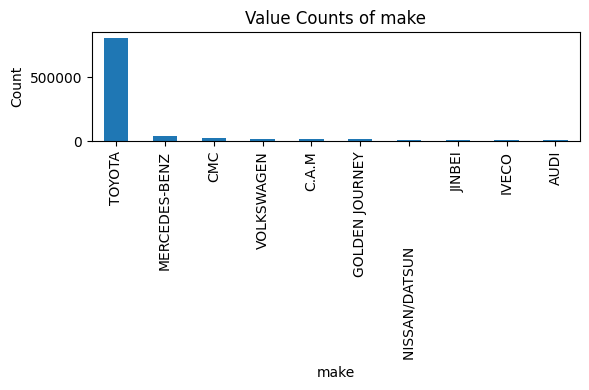

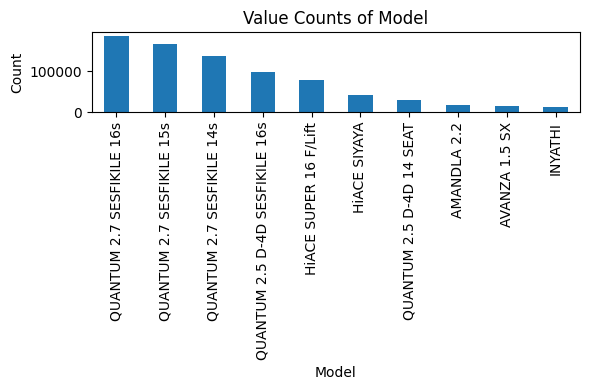

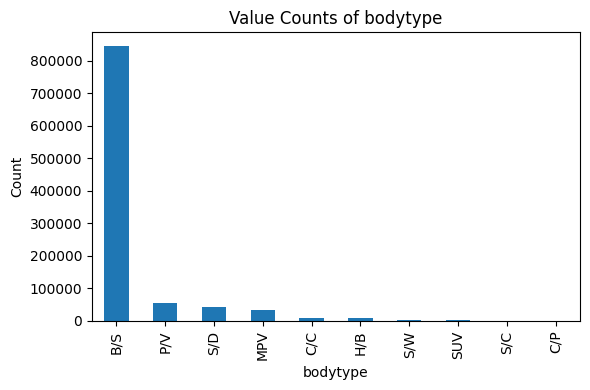

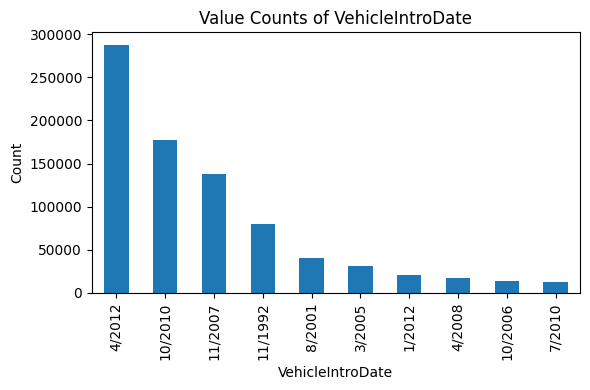

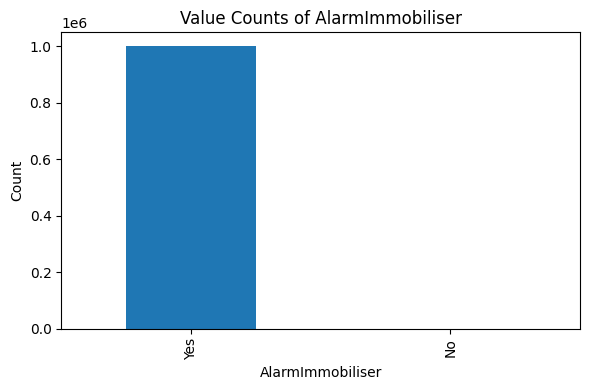

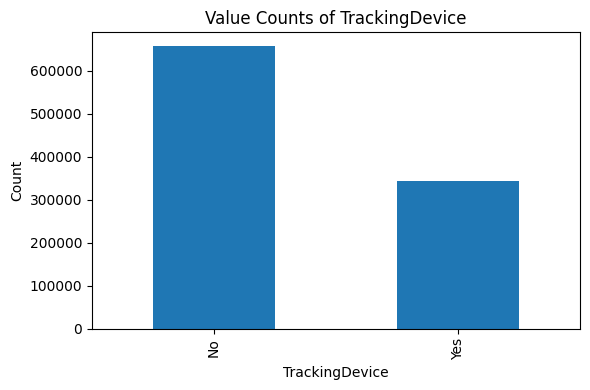

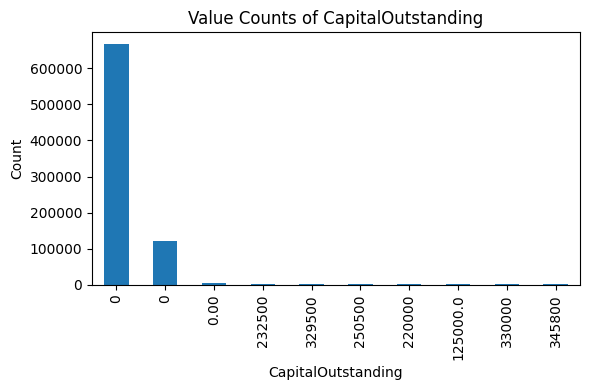

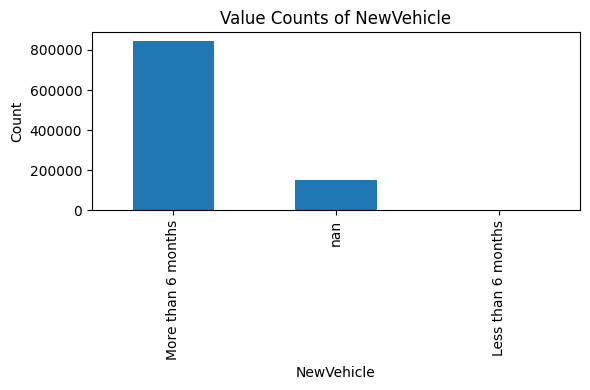

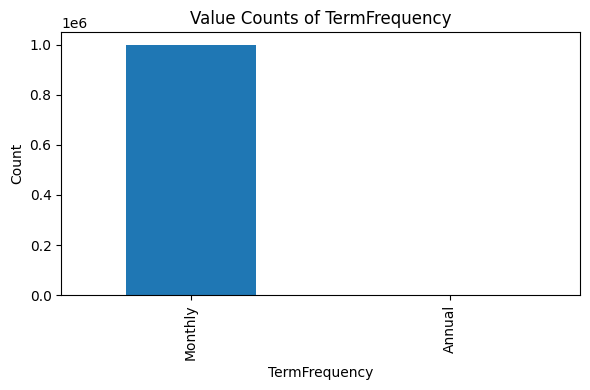

C:\Users\skibret\AppData\Local\Temp\ipykernel_13724\1369015302.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


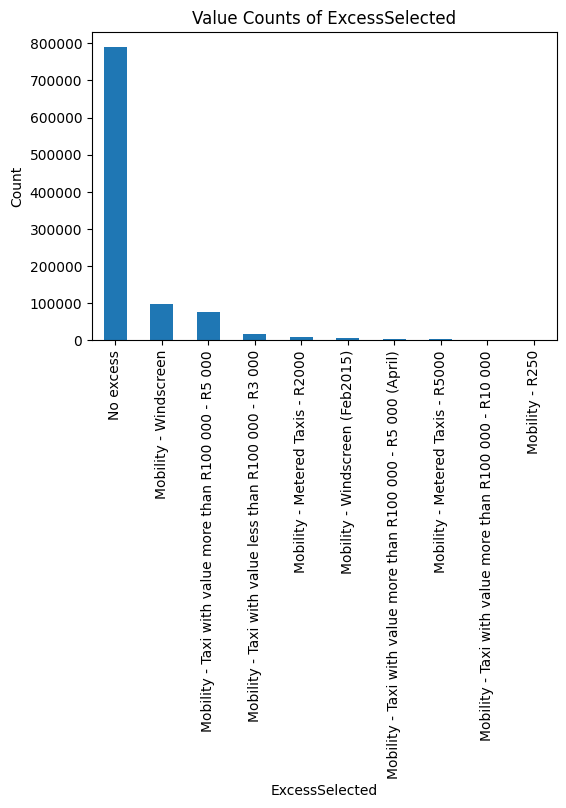

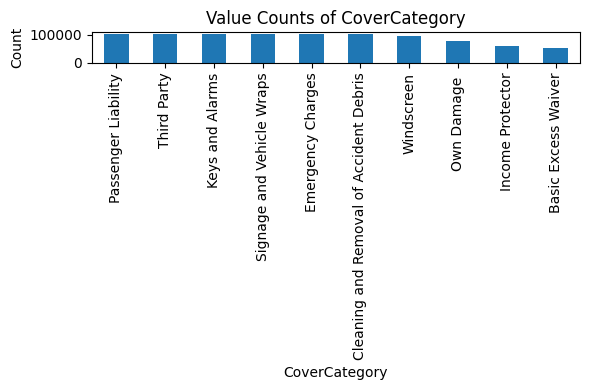

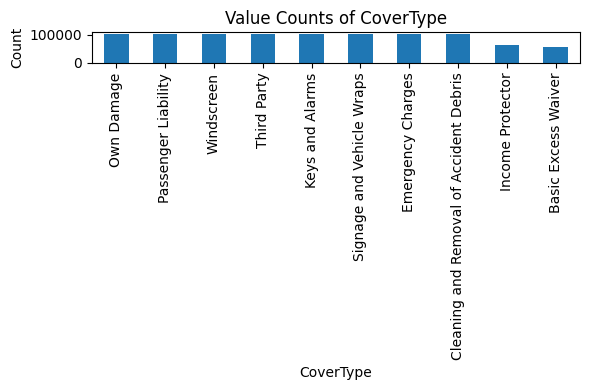

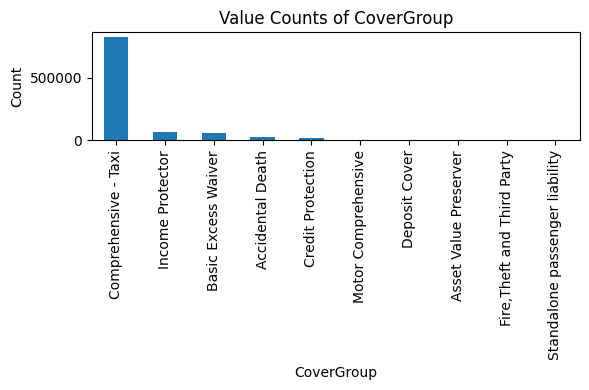

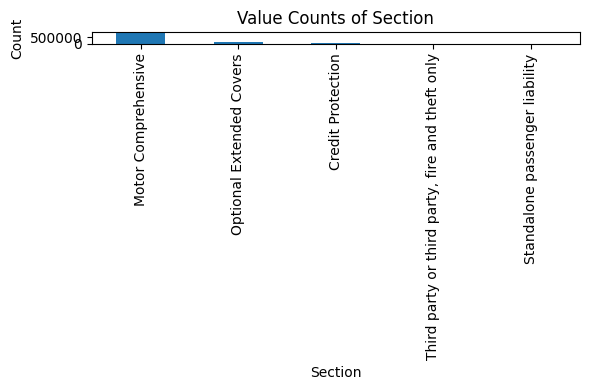

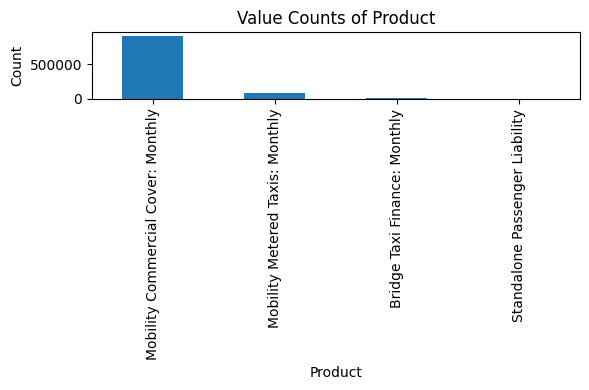

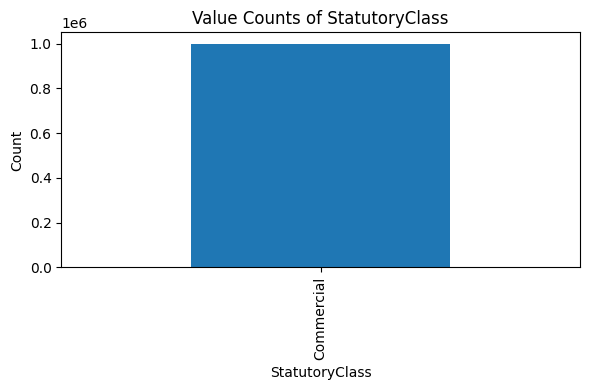

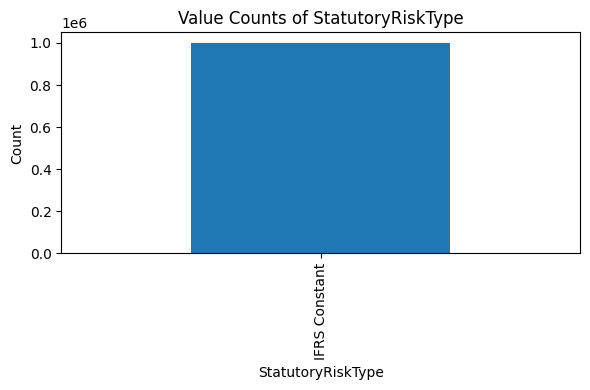

In [8]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()

# Plot bar charts (only top 10 categories)
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts(dropna=False).head(10).plot(kind="bar")
    plt.title(f"Value Counts of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


# 4 Bivarite Analysis

## monthly changes in TotalPremium and TotalClaims as a function of ZipCode

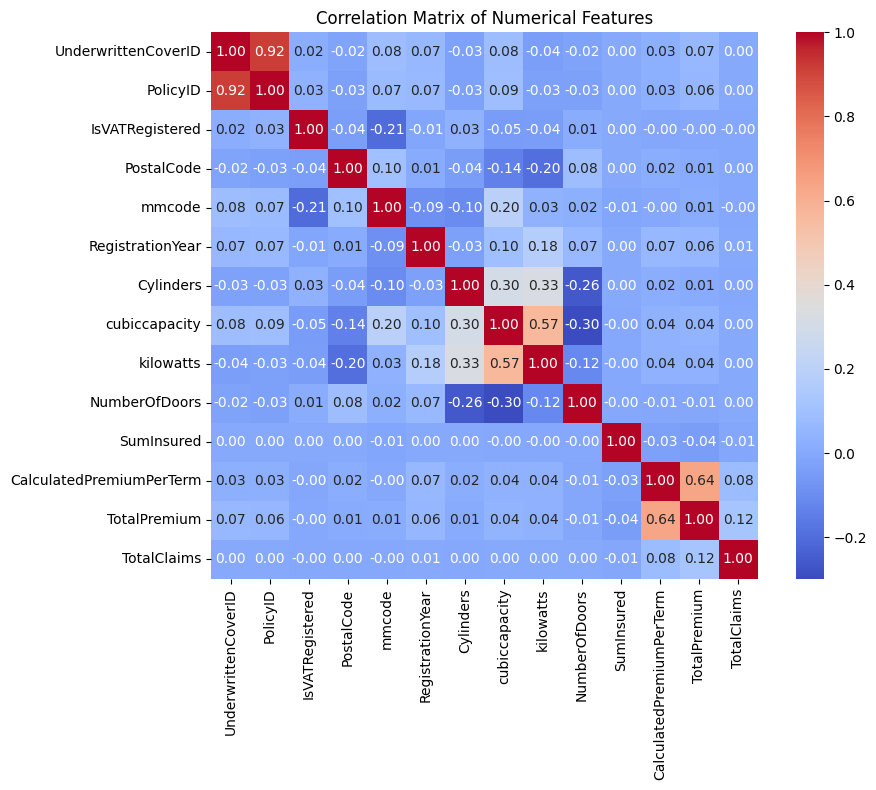

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

## Total Premiums and Total Scale as a Function of Postal Code

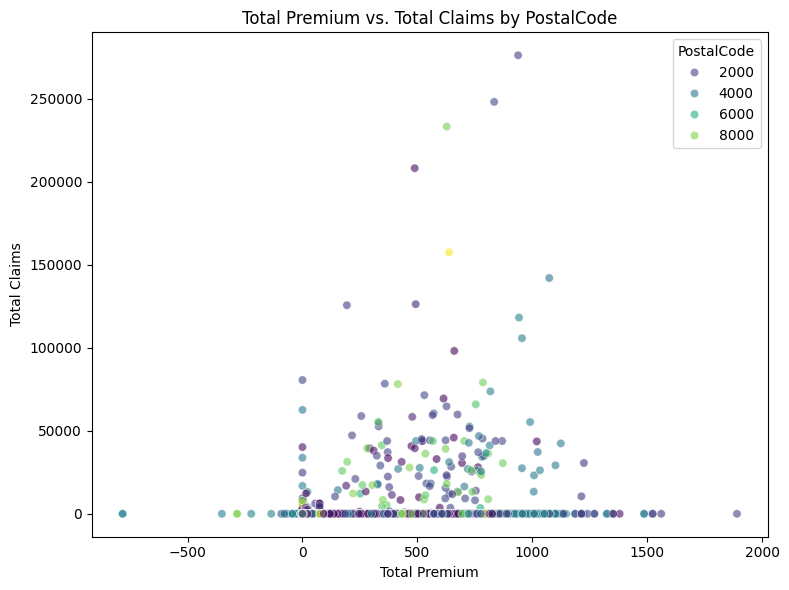

In [13]:
# Sample (optional, for speed and clarity)
#sample_df = df.sample(n=100000, random_state=42)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample_df, x="TotalPremium", y="TotalClaims", hue="PostalCode", palette="viridis", alpha=0.6)
plt.title("Total Premium vs. Total Claims by PostalCode")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
#plt.legend([],[], frameon=False)  # Hide legend if too many postal codes
plt.tight_layout()
plt.show()


## Loss ration by province and gender

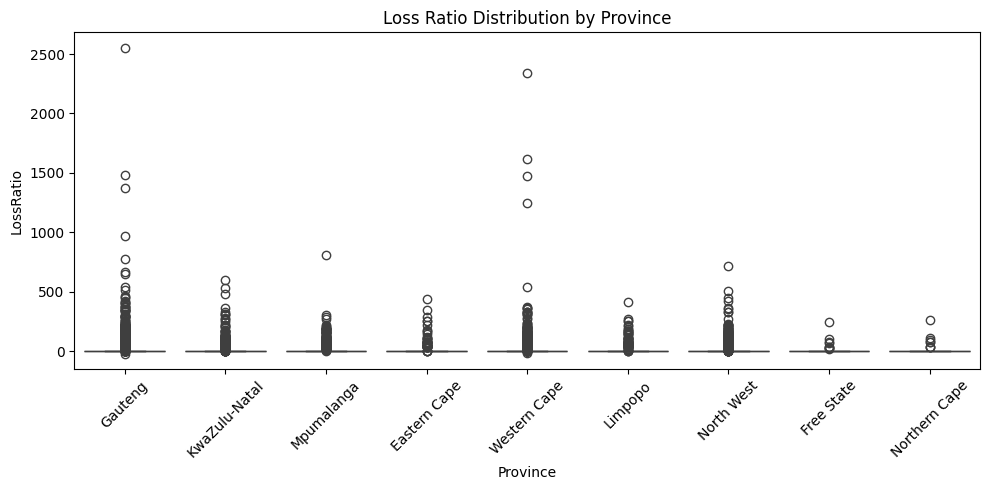

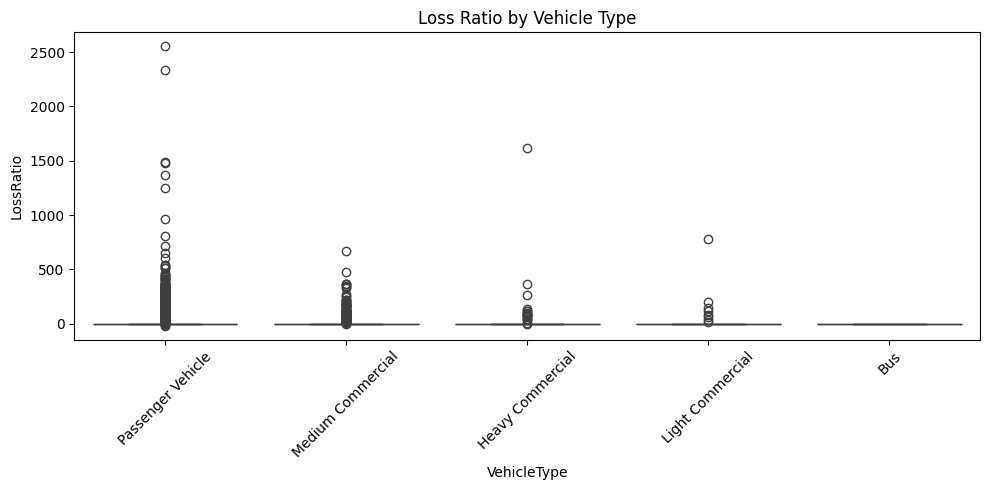

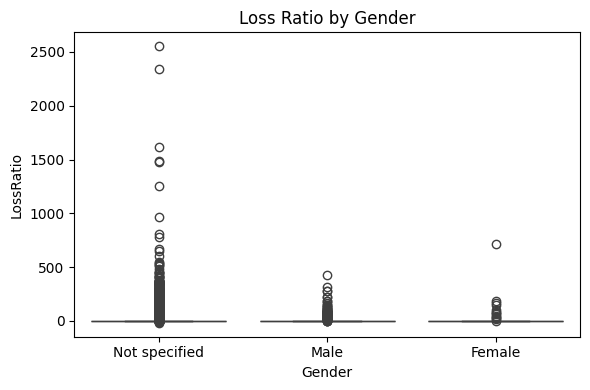

In [16]:
# Ensure LossRatio is calculated
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]
df["LossRatio"] = df["LossRatio"].replace([np.inf, -np.inf], np.nan)

# Province
plt.figure(figsize=(10, 5))
sns.boxplot(x="Province", y="LossRatio", data=df)
plt.title("Loss Ratio Distribution by Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# VehicleType
plt.figure(figsize=(10, 5))
sns.boxplot(x="VehicleType", y="LossRatio", data=df)
plt.title("Loss Ratio by Vehicle Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gender
plt.figure(figsize=(6, 4))
sns.boxplot(x="Gender", y="LossRatio", data=df)
plt.title("Loss Ratio by Gender")
plt.tight_layout()
plt.show()


# 5 Data Comparison — Trends Over Geography

C:\Users\skibret\AppData\Local\Temp\ipykernel_13724\2788759328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=premium_by_province.index, y=premium_by_province.values, palette="coolwarm")


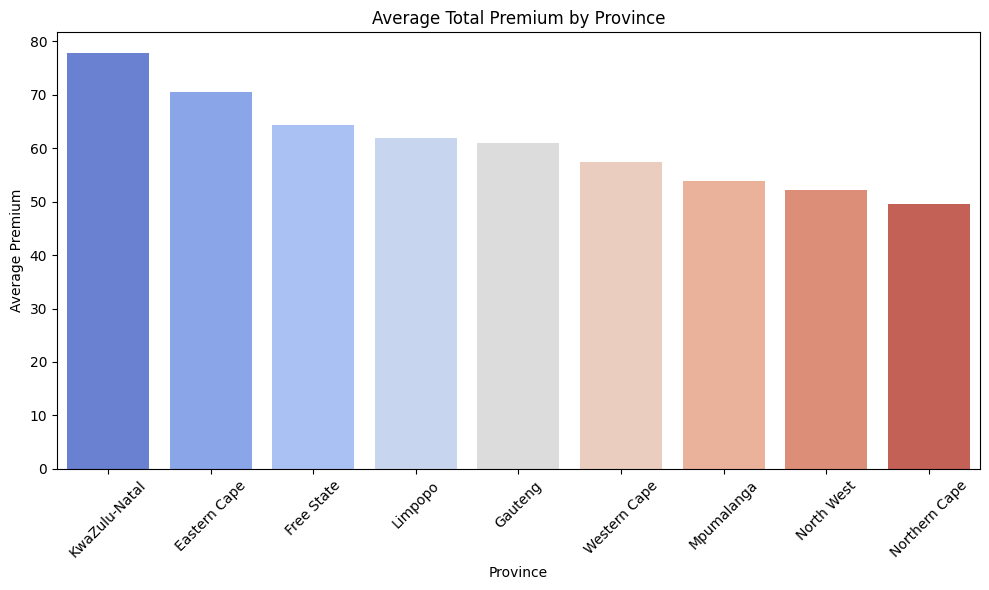

In [17]:
plt.figure(figsize=(10, 6))
premium_by_province = df.groupby("Province")["TotalPremium"].mean().sort_values(ascending=False)
sns.barplot(x=premium_by_province.index, y=premium_by_province.values, palette="coolwarm")
plt.title("Average Total Premium by Province")
plt.ylabel("Average Premium")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Vehicle Make Distribution by Province (Top 5 Makes)

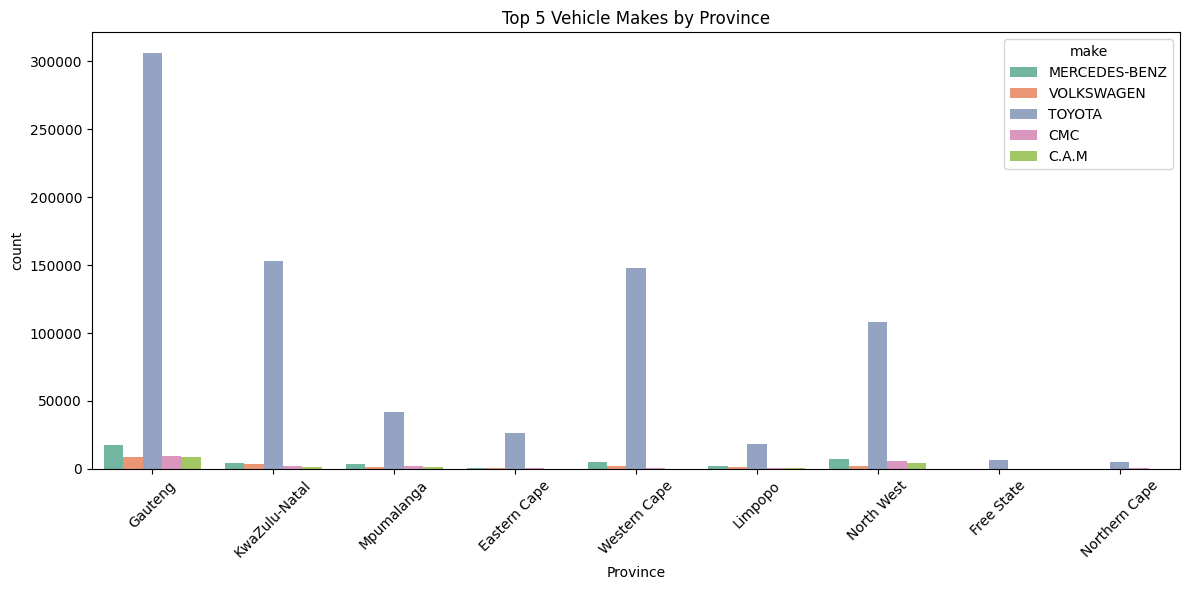

In [18]:
top_makes = df["make"].value_counts().head(5).index
filtered = df[df["make"].isin(top_makes)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered, x="Province", hue="make", palette="Set2")
plt.title("Top 5 Vehicle Makes by Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Cover Type Distribution Across Provinces

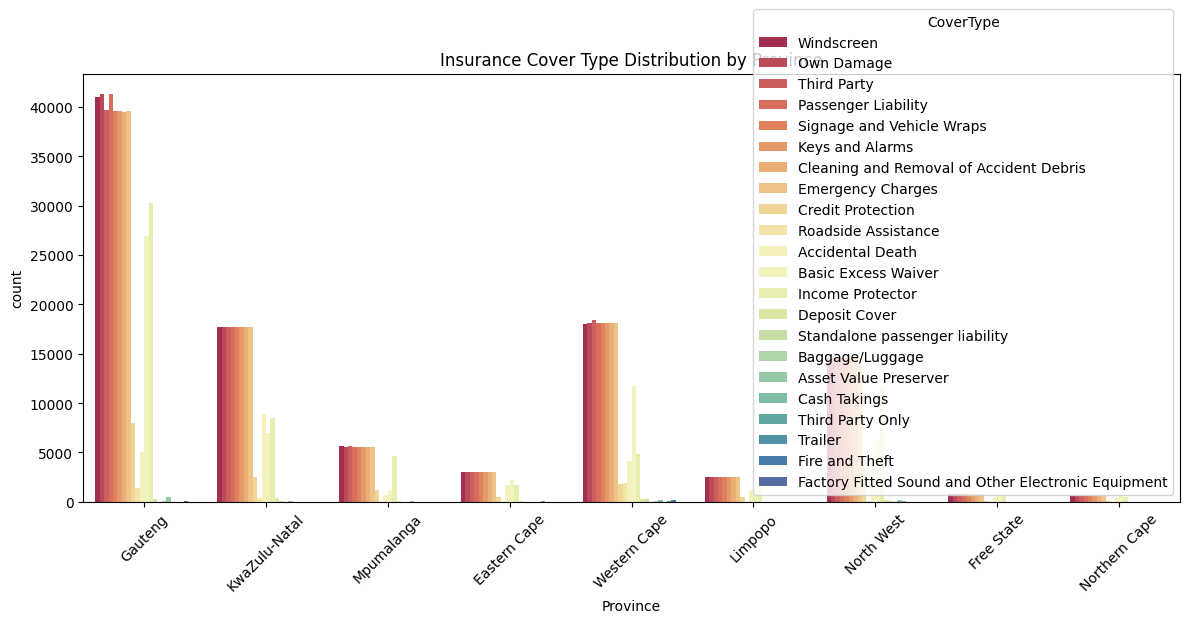

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Province", hue="CoverType", palette="Spectral")
plt.title("Insurance Cover Type Distribution by Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6 Outlier Detection

# Box Plot of TotalClaims

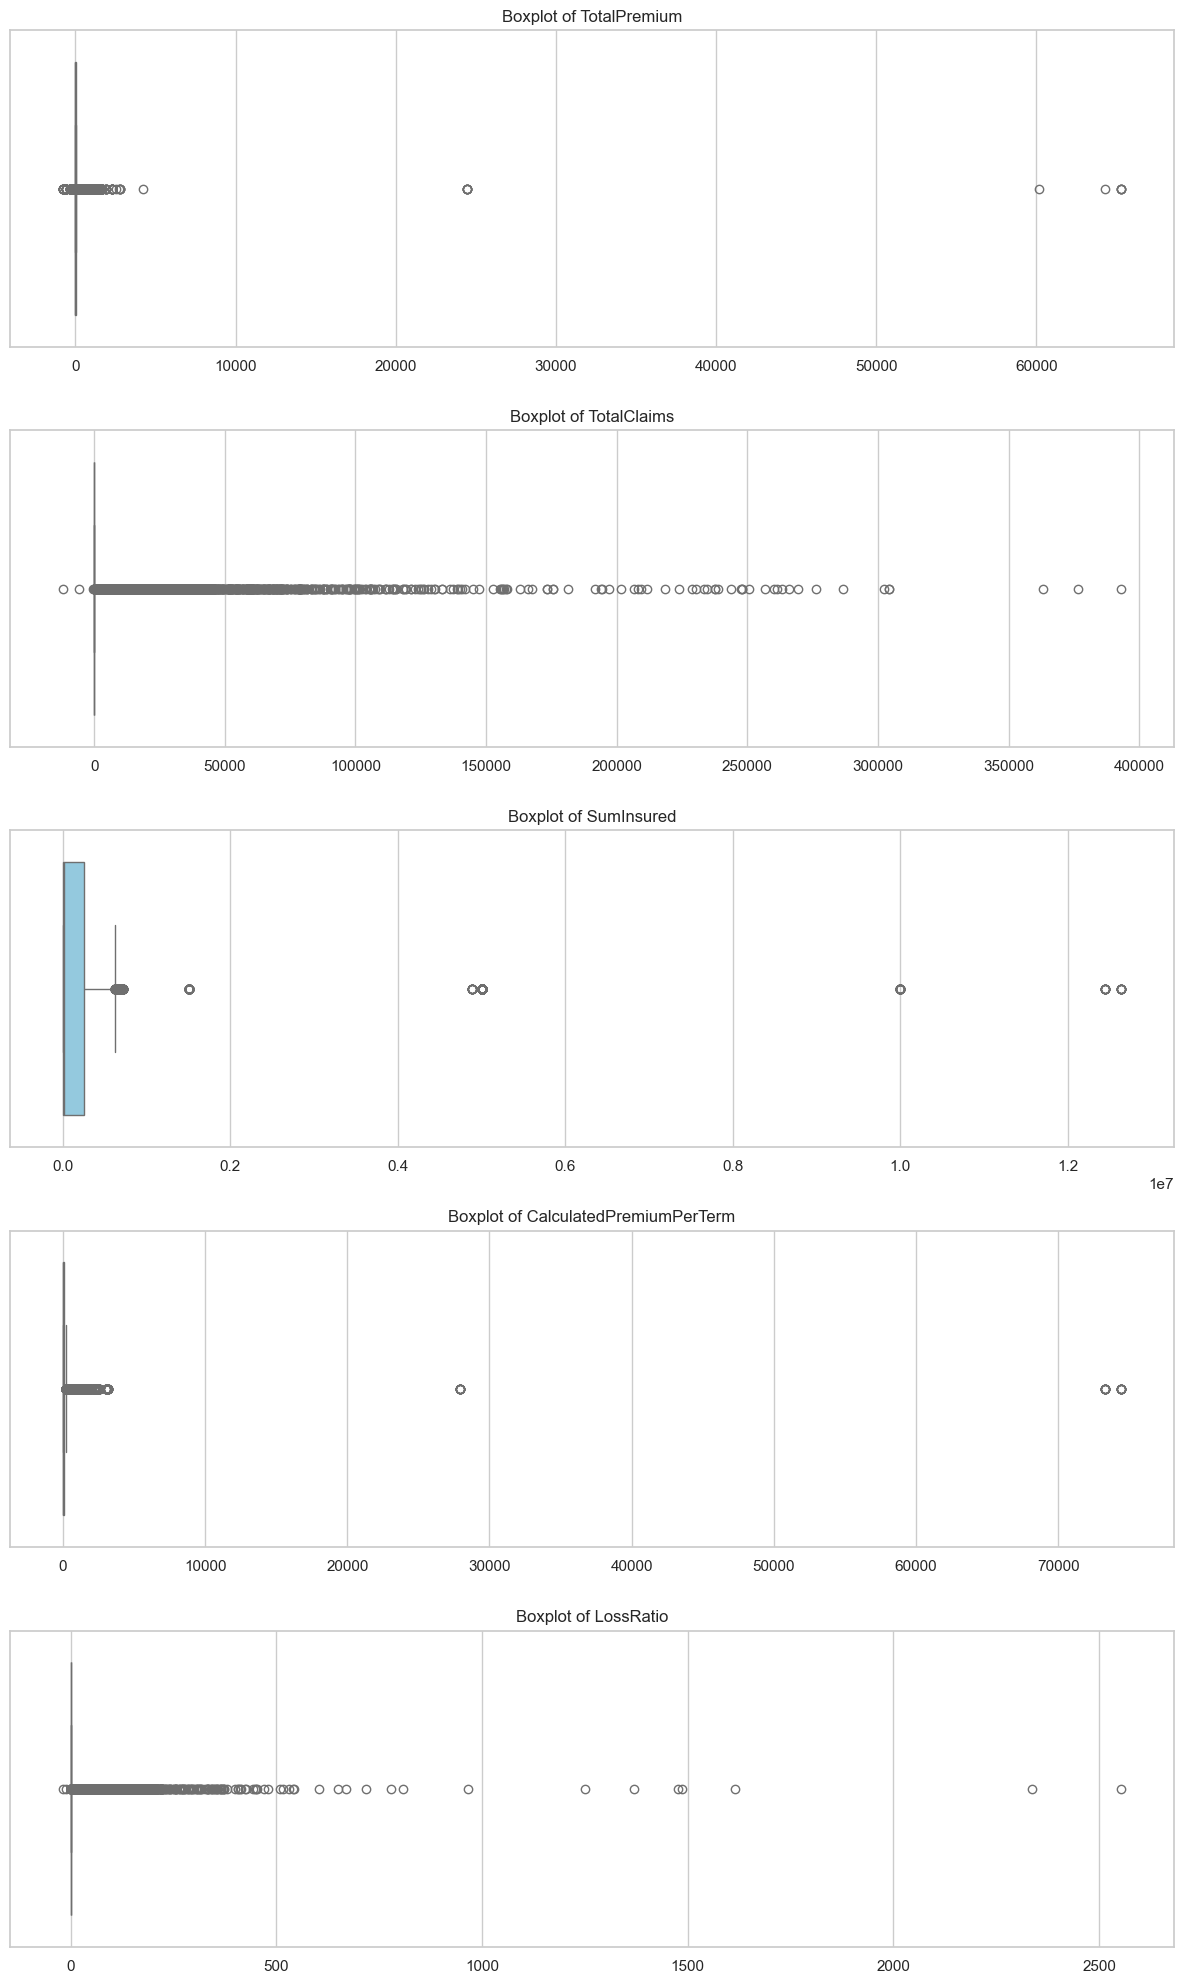

In [21]:
num_cols = ["TotalPremium", "TotalClaims", "SumInsured", "CalculatedPremiumPerTerm", "LossRatio"]

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, len(num_cols) * 4))

# Loop through columns and plot
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.xlabel("")  # Optional: keep it clean

plt.tight_layout()
plt.show()

# 7 Visualizations

C:\Users\skibret\AppData\Local\Temp\ipykernel_13724\4283019947.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y=grouped_data.values, palette="viridis")
C:\Users\skibret\AppData\Local\Temp\ipykernel_13724\4283019947.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y=grouped_data.values, palette="viridis")
C:\Users\skibret\AppData\Local\Temp\ipykernel_13724\4283019947.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y=grouped_data.values, palette="viridis")


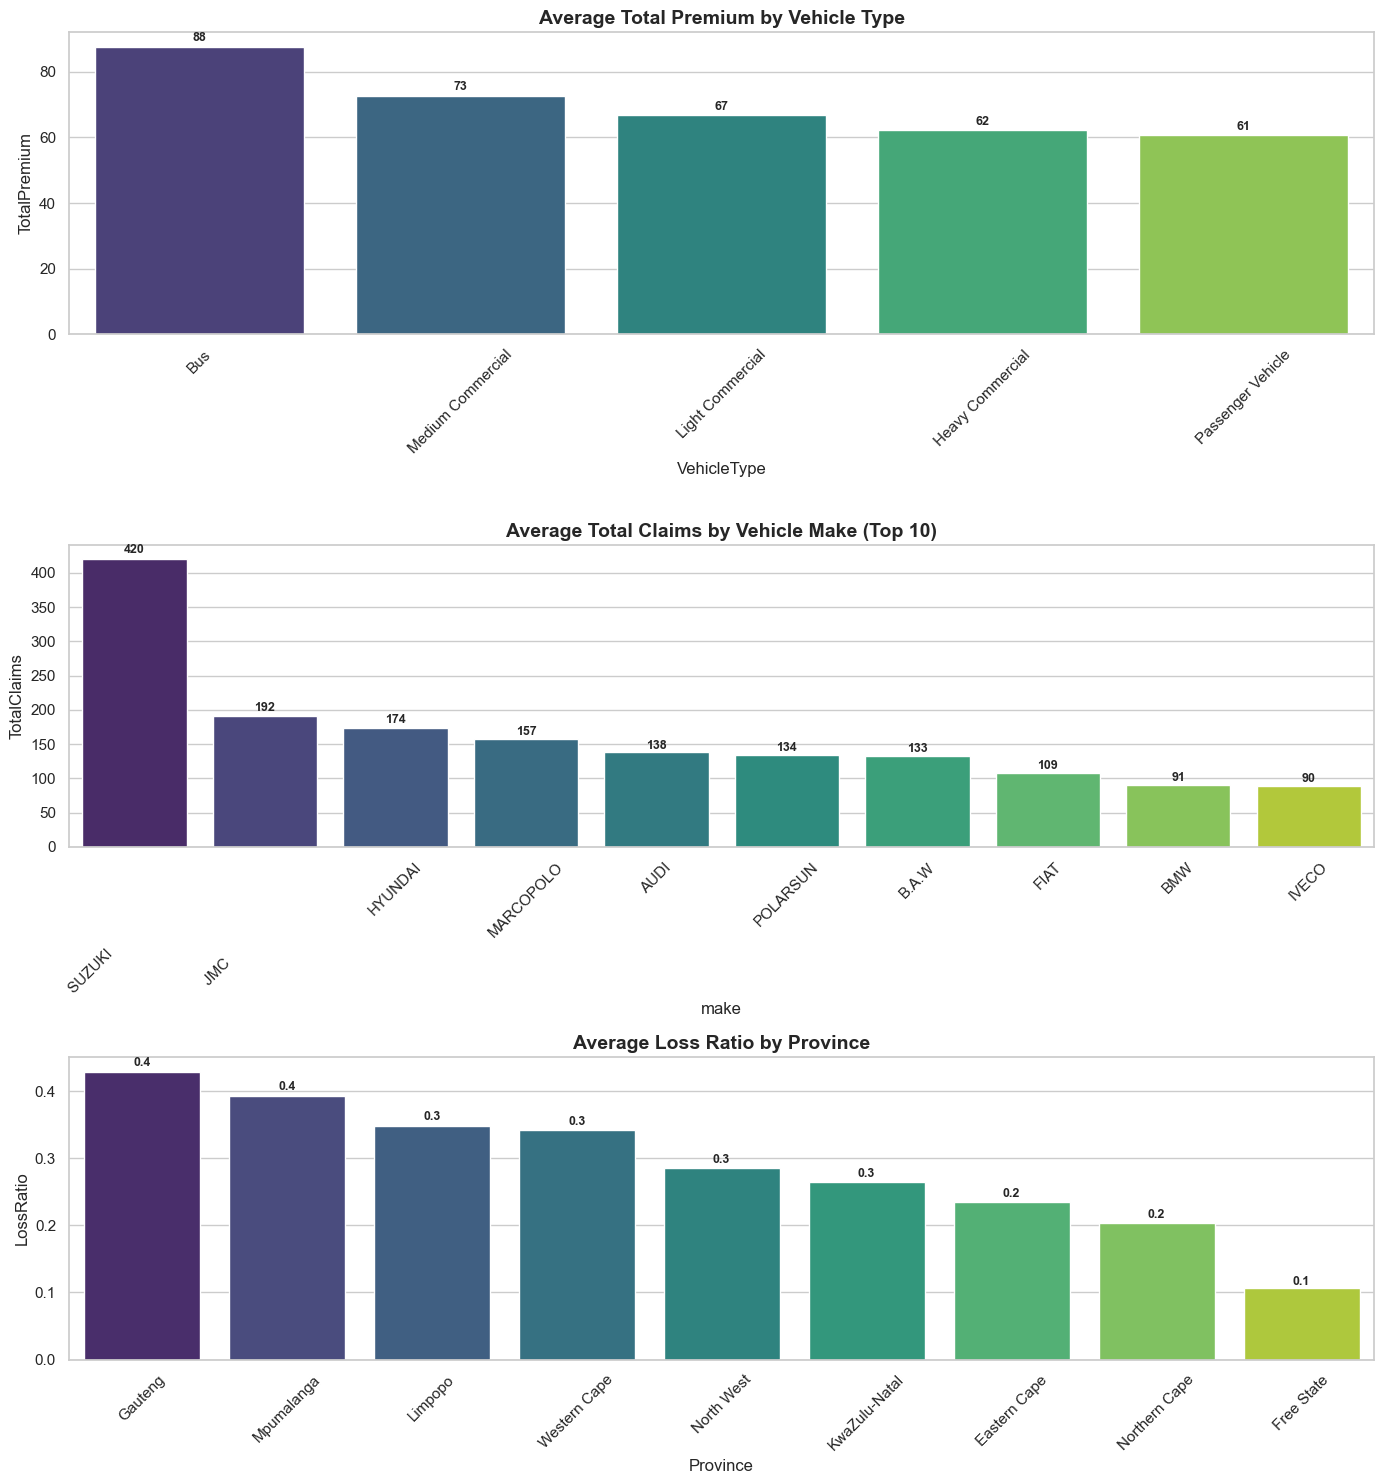

In [24]:
# Define the plot configs: (title, groupby column, metric column)
plots = [
    ("Average Total Premium by Vehicle Type", "VehicleType", "TotalPremium"),
    ("Average Total Claims by Vehicle Make (Top 10)", "make", "TotalClaims"),
    ("Average Loss Ratio by Province", "Province", "LossRatio")
]

sns.set(style="whitegrid")
plt.figure(figsize=(14, len(plots) * 5))

for i, (title, group_col, metric_col) in enumerate(plots, 1):
    plt.subplot(len(plots), 1, i)
    
    # Group, clean, and sort values
    grouped_data = df.groupby(group_col)[metric_col].mean().sort_values(ascending=False)
    
    # Limit make to top 10
    if group_col == "make":
        grouped_data = grouped_data.head(10)
    
    sns.barplot(x=grouped_data.index, y=grouped_data.values, palette="viridis")
    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel(metric_col)
    plt.xticks(rotation=45)

    # Annotate each bar
    for j, val in enumerate(grouped_data.values):
        if metric_col == "LossRatio":
            text = f"{val:.1f}"
        else:
            text = f"{val:.0f}"
        plt.text(j, val + val * 0.01, text, ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Export cleaned data

In [27]:
# Export cleaned DataFrame
df.to_csv("../data/processed/Cleaned_Machine_Learning_V1.txt", sep="|", index=False)
# Human-readable
df.to_csv("../data/processed/Cleaned_Machine_Learning_V1.CSV", sep="|", index=False)

# Efficient binary version for code
df.to_parquet("../data/processed/Cleaned_Machine_Learning_V1.parquet", index=False)


ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.